In [ ]:
import numpy as np
import math

def euclidean(image1, image2):
  return np.sqrt(np.sum((image1-image2)**2))

In [ ]:
import cv2
import os
for i in range(1,7):
  try:
    vidcap = cv2.VideoCapture('rc%d.mp4' % i)
    success,image = vidcap.read()
    count = 0
  except:
    print("there is no such an file")
  
  if not os.path.exists('frames%d' % i):
    os.makedirs('./frames%d/' % i)
    
  while success:
    cv2.imwrite(os.path.join('./frames%d/' % i, "%d.jpg" % count), image)     # save frame as JPEG file 
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob

# if os.getcwd() != 'frames':
#   os.chdir('./frames/')


def image_list(frames1, frames2):
  image_list1 = []
  image_list2 = []
  # distances = [[0] * len(image_list) for i in range(len(image_list))]
  distance = []
  distances = []
  
  for filename in glob.glob(frames1+'/*.jpg'):
    im = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    image_list1.append(im)
  
  for filename in glob.glob(frames2+'/*.jpg'):
    im = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    image_list2.append(im)

  return image_list1, image_list2
    

# print(image_list1)
# print(len(image_list1))
# print(image_list2)
# print(len(image_list2))


In [ ]:
# print(image_list1.shape)
# print(image_list2.shape)
# distances = np.empty((len(image_list1), len(image_list2)), int)

def distances(image_list1, image_list2):
  distances = []
  
  for i in range(len(image_list2)):
    distance = []
    for j in range(len(image_list1)):
      distance.append(euclidean(image_list1[j], image_list2[i]))
    distances.append(distance)

  distances = np.array(distances)
  
  return distances

print(distances)

<function distances at 0x7f9245eddd90>


In [ ]:
#visualize the distance matrix

def distance_cost_plot(distances):
  im = plt.imshow(distances, interpolation='nearest', cmap='Reds')
  plt.gca().invert_yaxis() #get the current axes instance and invert y axis
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.grid() #make grif
  plt.colorbar()

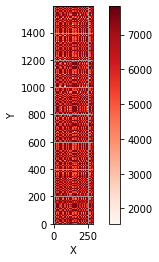

In [ ]:
frames1 = 'frames1'
frames2 = 'frames6'
image_list1, image_list2 = image_list(frames1, frames2)
_distances = distances(image_list1, image_list2)
distance_cost_plot(_distances)

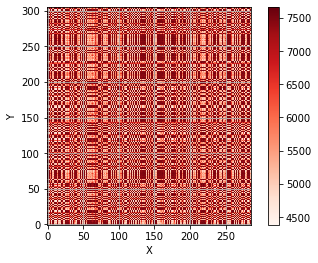

In [ ]:
frames1 = 'frames1'
frames2 = 'frames2'
image_list1, image_list2 = image_list(frames1, frames2)
_distances = distances(image_list1, image_list2)
distance_cost_plot(_distances)

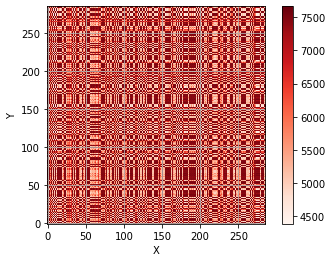

In [ ]:
frames1 = 'frames1'
frames2 = 'frames3'
image_list1, image_list2 = image_list(frames1, frames2)
_distances = distances(image_list1, image_list2)
distance_cost_plot(_distances)

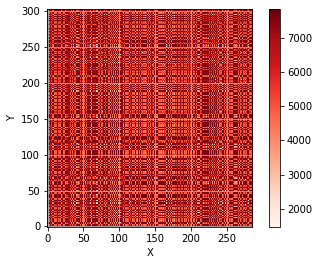

In [ ]:
frames1 = 'frames1'
frames2 = 'frames4'
image_list1, image_list2 = image_list(frames1, frames2)
_distances = distances(image_list1, image_list2)
distance_cost_plot(_distances)

In [ ]:
def make_path(image_list1, image_list2, accumulated_cost):
  result = []
  x = image_list1
  y = image_list2
  
  #finding the optimal warp path by backtracking
  path = [[len(x)-1, len(y)-1]]
  i = len(y) - 1
  j = len(x) - 1
  
  #backtrack procedure
  while i>0 and j>0:
    if i==0:
      j = j-1
    elif j==0:
      i = i-1
    else: #左、下、左下のどこのグリッドが最小値を取るかで次に進む場所を決める
      if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1,j], accumulated_cost[i,j-1]):
        i = i-1
      elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
        j = j-1
      else:
        i = i-1
        j = j-1
    path.append([j,i])
    result.append(accumulated_cost[i][j])
  path.append([0,0])

  return result, path

In [ ]:
def calc_dist(frame1, frame2):

  image_list1, image_list2 = image_list(frame1, frame2)
  _distances = distances(image_list1, image_list2)

  # distance_cost_plot(_distances)

  accumulated_cost = np.zeros((len(image_list2), len(image_list1)))
  accumulated_cost[0,0] = _distances[0,0]

  #move along the first row
  for i in range(1, len(image_list1)):
    accumulated_cost[0,i] = _distances[0,i] + accumulated_cost[0,i-1]
  
  # distance_cost_plot(accumulated_cost)
  
  #move along the first column
  for i in range(1, len(image_list2)):
    accumulated_cost[i,0] = _distances[i,0] + accumulated_cost[i-1, 0]
  
  # distance_cost_plot(accumulated_cost)
  
  for i in range(1, len(image_list2)):
      for j in range(1, len(image_list1)):
          accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + _distances[i, j]
          
  # distance_cost_plot(accumulated_cost)

  result, path = make_path(image_list1, image_list2, accumulated_cost)

  path_x = [point[0] for point in path]
  path_y = [point[1] for point in path]
  
  distance_cost_plot(accumulated_cost)
  plt.plot(path_x, path_y)

  return result, path


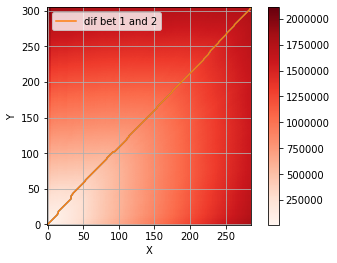

In [ ]:
result, path = calc_dist('frames1', 'frames2')

path_x = [point[0] for point in path]
path_y = [point[1] for point in path]
plt.plot(path_x, path_y, label="dif bet 1 and 2")
plt.legend()
# plt.show()

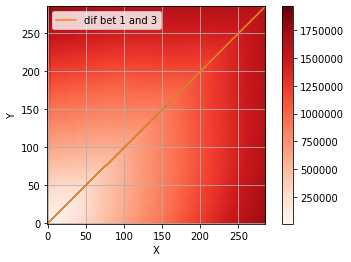

In [ ]:
result3, path = calc_dist('frames1', 'frames3')

path_x3 = [point[0] for point in path]
path_y3 = [point[1] for point in path]

plt.plot(path_x3, path_y3, label="dif bet 1 and 3")
plt.legend()
# plt.show()

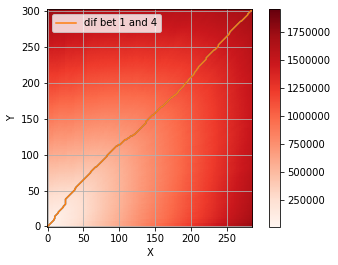

In [ ]:
result4, path = calc_dist('frames1', 'frames4')

path_x4 = [point[0] for point in path]
path_y4 = [point[1] for point in path]

plt.plot(path_x4, path_y4, label="dif bet 1 and 4")
plt.legend()
# plt.show()

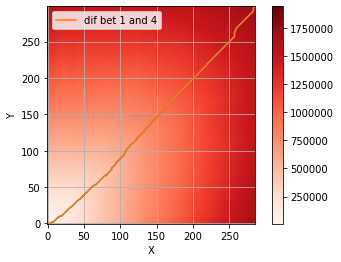

In [ ]:
result5, path = calc_dist('frames1', 'frames5')

path_x5 = [point[0] for point in path]
path_y5 = [point[1] for point in path]

plt.plot(path_x5, path_y5, label="dif bet 1 and 5")
plt.legend()
# plt.show()))

In [ ]:
result6, path = calc_dist('frames1', 'frames6')

path_x6 = [point[0] for point in path]
path_y6 = [point[1] for point in path]

plt.plot(path_x6, path_y6, label="dif bet 1 and 6")
plt.legend()
# plt.show()))

IndexError: ignored

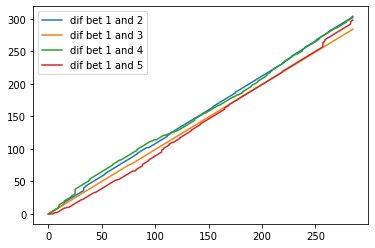

In [ ]:
plt.plot(path_x, path_y, label="dif bet 1 and 2")
plt.plot(path_x3, path_y3, label="dif bet 1 and 3")
plt.plot(path_x4, path_y4, label="dif bet 1 and 4")
plt.plot(path_x5, path_y5, label="dif bet 1 and 5")
plt.legend()
plt.show()

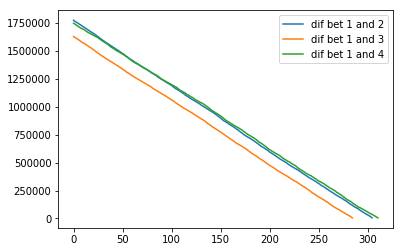

In [ ]:
plt.plot(result, label="dif bet 1 and 2")
plt.plot(result2, label="dif bet 1 and 3")
plt.plot(result3, label="dif bet 1 and 4")
plt.legend()
plt.show()

In [ ]:
dif_result = []
for i in range(len(result2)):
  dif_result.append(result1[i] - result2[i])

In [ ]:
same_result = []
for i in range(len(result2)):
  same_result.append(result1[i] - result2[i])

In [ ]:
plt.plot(dif_result, label="different result")
plt.plot(same_result, label="similar result")
plt.legend()
plt.show()

In [ ]:
plt.plot(result1, label="similar action")
plt.plot(result2, label="different action")
plt.legend()
plt.show()

In [ ]:
path = make_path('frames1', 'frames2', accumulated_cost)
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y)

In [ ]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

"""feature detection."""

import cv2
import os
import matplotlib.pyplot as plt
from natsort import natsorted
import numpy as np

TARGET_FILE = 'pivot1.JPG'
# IMG_DIR = os.path.abspath(os.path.dirname(__file__)) + './'
IMG_DIR = './frames2/'
IMG_SIZE = (200, 200)
ORI_IMG_DIR = './frames1/'

# target_img_path = TARGET_FILE
# target_img = cv2.imread(target_img_path, cv2.IMREAD_GRAYSCALE)
# target_img = cv2.resize(target_img, IMG_SIZE)

# bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# detector = cv2.ORB_create()
# detector = cv2.AKAZE_create()
# (target_kp, target_des) = detector.detectAndCompute(target_img, None)

# print('TARGET_FILE: %s' % (TARGET_FILE))

files = os.listdir(IMG_DIR)
files = natsorted(files)
files_ = os.listdir(ORI_IMG_DIR)
files_ = natsorted(files_)
ret = []
rep = []
distance_ = []
distances_ = []
count = 0

for file_ in files:
  target_img = cv2.imread(file_, 0)
  print(target_img)
  
for file_ in files_:
  
  target_img = cv2.imread(file_, cv2.IMREAD_GRAYSCALE)
  print(target_img)
  target_img = cv2.resize(target_img, IMG_SIZE)
  
  bf = cv2.BFMatcher(cv2.NORM_HAMMING)
  # detector = cv2.ORB_create()
  detector = cv2.AKAZE_create()
  (target_kp, target_des) = detector.detectAndCompute(target_img, None)
  
  for file in files:
    if file == '.DS_Store' or file == TARGET_FILE:
        continue
  
    comparing_img_path = os.path.join(IMG_DIR + file)
    try:
        comparing_img = cv2.imread(comparing_img_path, cv2.IMREAD_GRAYSCALE)
        comparing_img = cv2.resize(comparing_img, IMG_SIZE)
        (comparing_kp, comparing_des) = detector.detectAndCompute(comparing_img, None)
        matches = bf.match(target_des, comparing_des)
        dist = [m.distance for m in matches]
        ret.append(sum(dist) / len(dist))
        count += 1
        rep.append(count)
    except cv2.error:
        ret = 100000
    distance_.append(ret)
  distances_.append(distance_)

# print(ret)
# x = np.array(rep)
# y = np.array(ret)
# plt.plot(x, y)
# plt.show()


In [ ]:
print(distances_)

TARGET_FILE: pivot1.JPG


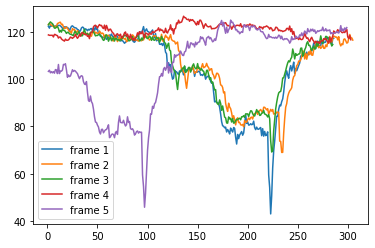

In [ ]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

"""feature detection."""

import cv2
import os
import matplotlib.pyplot as plt
from natsort import natsorted
import numpy as np

TARGET_FILE = 'pivot1.JPG'
# IMG_DIR = os.path.abspath(os.path.dirname(__file__)) + './'
IMG_DIR = './frames'
IMG_SIZE = (200, 200)

target_img_path = TARGET_FILE
target_img = cv2.imread(target_img_path, cv2.IMREAD_GRAYSCALE)
target_img = cv2.resize(target_img, IMG_SIZE)

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# detector = cv2.ORB_create()
detector = cv2.AKAZE_create()
(target_kp, target_des) = detector.detectAndCompute(target_img, None)

print('TARGET_FILE: %s' % (TARGET_FILE))

for i in range(1,6):
  NEW_IMG_DIR = IMG_DIR + str(i) + '/'
  files = os.listdir(NEW_IMG_DIR)
  files = natsorted(files)
  ret = []
  rep = []
  count = 0
  for file in files:
      if file == '.DS_Store' or file == TARGET_FILE:
          continue
  
      comparing_img_path = os.path.join(NEW_IMG_DIR + file)
      try:
          comparing_img = cv2.imread(comparing_img_path, cv2.IMREAD_GRAYSCALE)
          comparing_img = cv2.resize(comparing_img, IMG_SIZE)
          (comparing_kp, comparing_des) = detector.detectAndCompute(comparing_img, None)
          matches = bf.match(target_des, comparing_des)
          dist = [m.distance for m in matches]
          ret.append(sum(dist) / len(dist))
          count += 1
          rep.append(count)
      except cv2.error:
          ret = 100000
  
  # print(ret)
  x = np.array(rep)
  y = np.array(ret)
  plt.plot(x, y, label="frame %d" % i)
  plt.legend()
plt.show()
      # print(ret)
      # if(ret < 70)
      #   print(file, ret)

In [ ]:
import numpy as np
a = 1
b = 0
big = np.array([1])
big = big.astype(np.float32)
print(big)

[1.]
